0   files/5.jpeg   2
1   files/5Back.jpg   17
2   files/10.jpeg   6
3   files/10oldF.jpg   9
4   files/10oldB.jpg   8
5   files/20.jpeg   5
6   files/20oldB.jpg   4
7   files/20oldF.jpg   1
8   files/50.jpeg   11
9   files/50Back.jpg   5
10   files/100.jpeg   0
11   files/100Back.jpg   9
12   files/200.jpeg   6
13   files/200Back.jpg   6
files/5Back.jpg
good matches  17

Detected denomination: Rs.  5Back


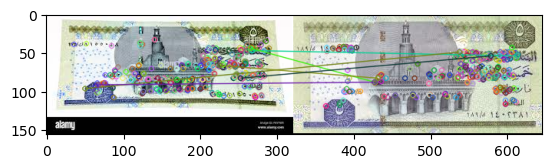

In [3]:
#!/usr/bin/python

# test file
# TODO:
# 	Figure out four point transform
#	Figure out testing data warping
# 	Use webcam as input
# 	Figure out how to use contours
# 		Currently detects inner rect -> detect outermost rectangle
# 	Try using video stream from android phone


from utils import *
from matplotlib import pyplot as plt

import subprocess
from gtts import gTTS


max_val = 8
max_pt = -1
max_kp = 0

orb = cv2.ORB_create()
# orb is an alternative to SIFT

test_img = read_img('files/5test.jpg')
# resizing must be dynamic
original = resize_img(test_img, 0.4)
display('original', original)

# keypoints and descriptors
# (kp1, des1) = orb.detectAndCompute(test_img, None)
(kp1, des1) = orb.detectAndCompute(test_img, None)

training_set = ['files/5.jpeg', 'files/5Back.jpg','files/10.jpeg','files/10oldF.jpg','files/10oldB.jpg', 'files/20.jpeg','files/20oldB.jpg' ,'files/20oldF.jpg',
                'files/50.jpeg', 'files/50Back.jpg', 'files/100.jpeg','files/100Back.jpg','files/200.jpeg','files/200Back.jpg']

for i in range(0, len(training_set)):
	# train image
	train_img = cv2.imread(training_set[i])

	(kp2, des2) = orb.detectAndCompute(train_img, None)

	# brute force matcher
	bf = cv2.BFMatcher()
	all_matches = bf.knnMatch(des1, des2, k=2)

	good = []
	# give an arbitrary number -> 0.789
	# if good -> append to list of good matches
	for (m, n) in all_matches:
		if m.distance < 0.789 * n.distance:
			good.append([m])

	if len(good) > max_val:
		max_val = len(good)
		max_pt = i
		max_kp = kp2

	print(i, ' ', training_set[i], ' ', len(good))

if max_val != 8:
	print(training_set[max_pt])
	print('good matches ', max_val)

	train_img = cv2.imread(training_set[max_pt])
	img3 = cv2.drawMatchesKnn(test_img, kp1, train_img, max_kp, good, 4)
	
	note = str(training_set[max_pt])[6:-4]
	print('\nDetected denomination: Rs. ', note)

	audio_file = 'audio/' + note +'new'+'.mp3'

	audio_file = "value.mp3"
	tts = gTTS(text=note, lang="en")
	tts.save(audio_file)
	#return_code = subprocess.call(["afplay", audio_file])

	(plt.imshow(img3), plt.show())
else:
	print('No Matches')